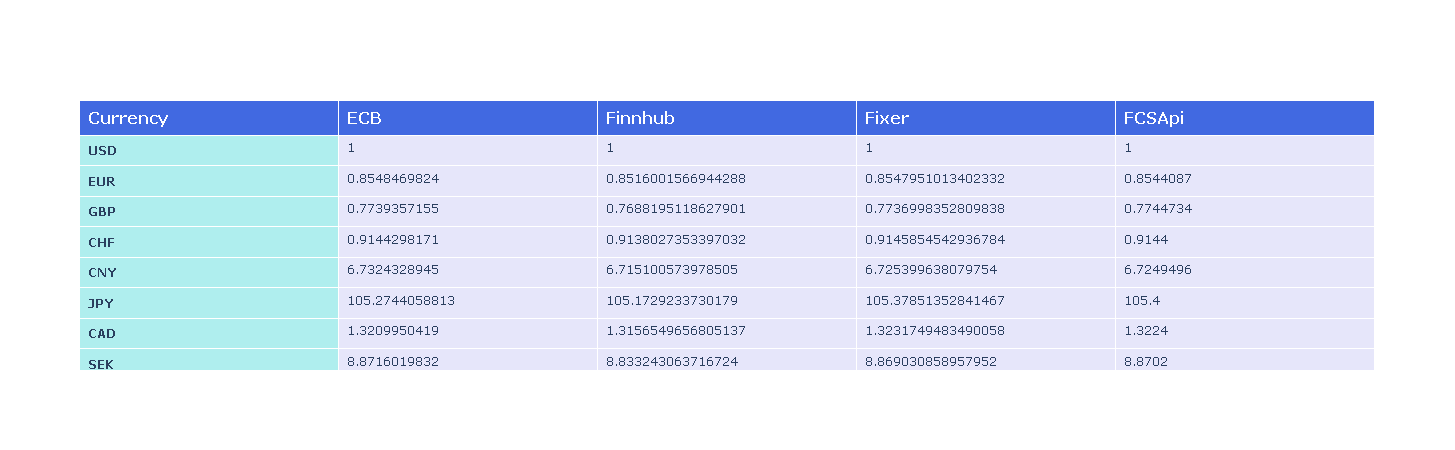

In [2]:
"""
Description: Get current currency rates from different providers for comparison.
Author: Richard van Wijk
Maintainer: Richard van Wijk
Email: vanwijk@ducata.com
Status: Dev
"""
import requests
import json
import pandas as pd
import plotly
import plotly.graph_objects as go
import plotly.offline as py

class externalAPI:
    
    def __init__(self):

        self.symbols = 'USD,EUR,GBP,CHF,CNY,JPY,CAD,SEK,NOK,SGD,AUD,NZD,ZAR'
        self.symbolsList = ['USD','EUR','GBP','CHF','CNY','JPY','CAD','SEK','NOK','SGD','AUD','NZD','ZAR']
        self.convSymbols = ['GBP','CHF','CNY','JPY','CAD','SEK','NOK','SGD','AUD','NZD','ZAR']
        
        FinnhubToken = 'geheim'
        FixerToken = 'geheim'
        FCSAPIToken = 'geheim'
        
        self.apiDict = {'ECB' : ['https://api.exchangeratesapi.io/latest', 'rates', {'base' : 'USD', 'symbols' : self.symbols}],
                   'Finnhub' : ['https://finnhub.io/api/v1/forex/rates', 'quote', {'base' : 'USD', 'token' : FinnhubToken}],
                   'Fixer' : ['http://data.fixer.io/api/latest', 'rates', {'symbols' : self.symbols, 'access_key' : FixerToken}],
                   'FCSApi' : ['https://fcsapi.com/api-v2/forex/base_latest', 'response' ,{'symbol' : 'USD', 'type' : 'forex', 'access_key' : FCSAPIToken}]
                   } 
        
        self.resultList = [[],[],[],[],[]]
        self.resultList[0] = self.symbolsList

        
    def EUR2USD(self, responseDict):
               
        USD = responseDict['USD']
        
        responseDict['EUR'] = 1/ USD
        responseDict['USD'] = 1

        
        for currency in self.convSymbols:
            
            EURrate = responseDict[currency]
            USDrate = responseDict[currency] * responseDict['EUR']
            
            responseDict[currency] = USDrate
            
        return responseDict  
        

    def APIcall(self):
        
        #Finnhub => token = API_KEY
        #Fixer => access_key = API_KEY
        
        loopInt = 1
        
        for extProvider in self.apiDict:
            
            url = self.apiDict[extProvider][0]
            rateData = self.apiDict[extProvider][1]
           
            paramsDict = self.apiDict[extProvider][2]
            
            response = requests.request('GET', url, params=paramsDict)
            data = response.json()
            itemsDict = data[rateData]
            
            if extProvider == 'Fixer':
                itemsDict = self.EUR2USD(itemsDict)
              
            for currency in self.symbolsList:
                
                self.resultList[loopInt].append(itemsDict[currency])
            
            loopInt += 1
            
            #print("USD: %s EUR: %s GBP: %s CHF: %s CNY: %s JPY: %s CAD: %s SEK: %s NOK: %s SGD: %s AUD: %s NZD: %s ZAR: %s\n" 
            #      %(itemsDict['USD'],itemsDict['EUR'],itemsDict['GBP'],itemsDict['CHF'],itemsDict['CNY'],itemsDict['JPY'],
            #      itemsDict['CAD'],itemsDict['SEK'],itemsDict['NOK'],itemsDict['SGD'],itemsDict['AUD'],itemsDict['NZD'],itemsDict['ZAR']))
            
        return self.resultList

    
APICallObj = externalAPI()
tableList = APICallObj.APIcall()

currencyList = []

for item in tableList[0]:
    currencyList.append('<b>' + item + '</b>')
    
fig = go.Figure(data=[go.Table(
    header=dict(values=["<b>Currency</b>", "<b>ECB</b>", "<b>Finnhub</b>", "<b>Fixer</b>", "<b>FCSApi</b>"],
                font=dict(color='white', size=16),
                fill_color='royalblue',
                align='left'),
    cells=dict(values=[currencyList, tableList[1], tableList[2], tableList[3], tableList[4]],
               fill=dict(color=['paleturquoise', 'lavender']),
               align='left'))
])

#fig.update_layout(width=1200, height=1200)
fig.show()